In [1]:
using ThreePhotons
using PyPlot
using HDF5
using PyPlot
using ProgressMeter
using Images
using Interact
using ClobberingReload
include("plotting.jl")

compare_histogram_with_theory

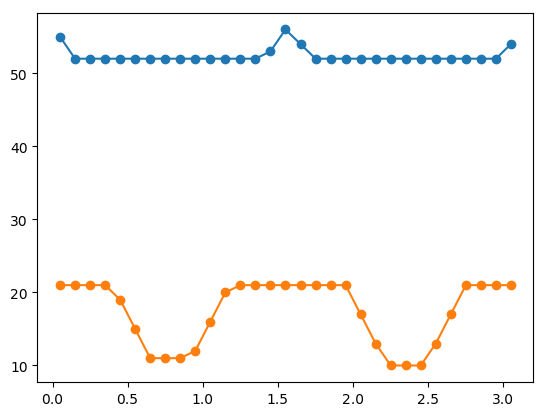

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32b6ddd50>

In [2]:
function get_vectors(k1::Float64,k2::Float64,alpha::Float64, phi::Float64)
    R = [cos(phi) -sin(phi); sin(phi) cos(phi)]
    K1 = k1*R*[0,1]
    K2 = k2*R*[sin(alpha), cos(alpha)]
    return K1,K2
end

function beamstop(K::Vector{Float64}, beamstop_width::Float64)
    (abs(K[1]) > beamstop_width && abs(K[2]) > beamstop_width) ? 1.0 : 0.0
end

function double_product(k1::Float64, k2::Float64, alpha::Float64, phi::Float64)
    K1,K2 = get_vectors(k1,k2,alpha,phi)
    return beamstop(K1, 0.25) * beamstop(K2, 0.25)
end

function integrate_beamstop(k1::Float64, k2::Float64, alpha::Float64)
    return sum( double_product(k1, k2, alpha, phi) for phi=0:0.1:2.0*pi)
end
ar = 0.05:0.1:pi-0.05
plot(collect(ar), [integrate_beamstop(6.0, 3.0, alpha) for alpha in ar], "o-")
plot(collect(ar), [integrate_beamstop(0.5, 2.0, alpha) for alpha in ar], "o-")

# get_vectors(1.0, 1.0, pi/9, float(0))

In [3]:
#Calculate the beamstop of the experimental data

In [3]:
photonConverter = h5open("../../../data/exp_data/Coliphage/amo86615_194_PR772_single.h5", "r") do file
    read(file["photonConverter"])
end
println("Loaded")

Loaded


In [4]:
sum = 0
for i = 1:500
    sum += convert(Array{Float64},photonConverter["pnccdBack"]["photonCount"][:,:,i])
end
beamstop_map = (convert(Array{Float64},(abs(sum) .< eps())))
println("finished")

finished


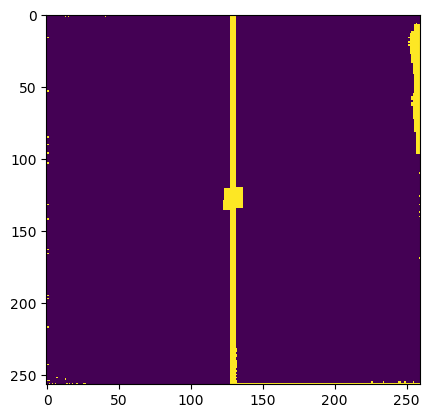

PyObject <matplotlib.image.AxesImage object at 0x32030d290>

In [5]:
imshow(beamstop_map)

In [37]:
creload("ThreePhotons")

INFO: Reloading ThreePhotons


"ThreePhotons"

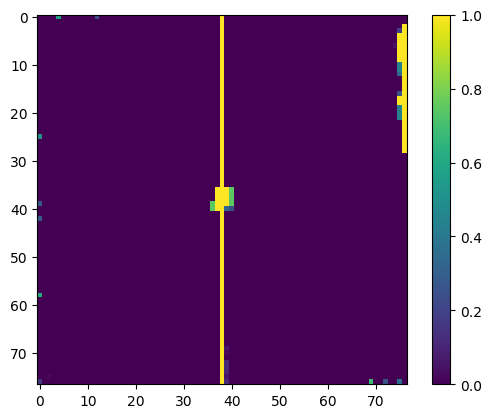

  likely near In[7]:2


PyObject <matplotlib.colorbar.Colorbar object at 0x3267f3fd0>

In [7]:
#Size down
beamstop_map_resized = Images.imresize(convert(Images.Image,beamstop_map), (2*38+1, 2*38+1)).data
imshow(beamstop_map_resized)
colorbar()

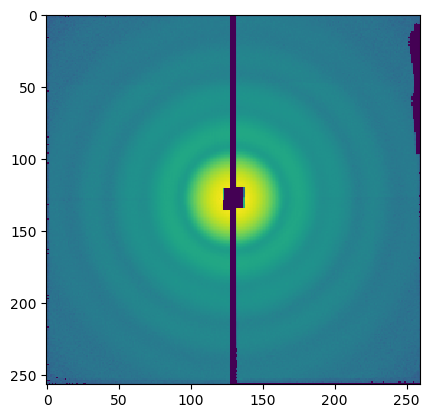

PyObject <matplotlib.image.AxesImage object at 0x344dd36d0>

In [8]:
imshow(sum.^(0.1))

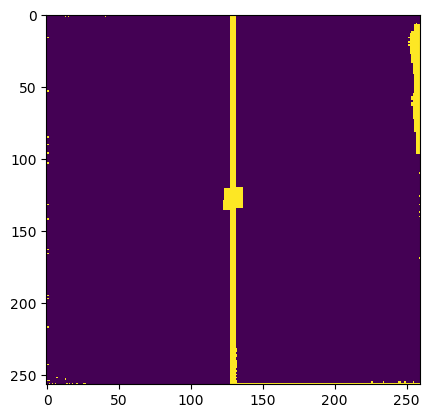

PyObject <matplotlib.image.AxesImage object at 0x35236ba90>

In [9]:
imshow(beamstop_map)

In [4]:
# Loading Coliphage correlation
c2_coliphage_with_beamstop,_,c3_coliphage_with_beamstop,_,c1_coliphage = loadHistograms(8,8,"/Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/coliphage/histo.dat")
coliphage_params,_,_,_ = deserializeFromFile("/Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/coliphage/histo.dat") 
c2_coliphage_beamstop_only,_,c3_coliphage_beamstop_only,_,_ = loadHistograms(8,8,"/Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/coliphage_beamstop/histo.dat")
println("Done")

Loaded 1.0381881827951252e14 doublets and 5.049067908010873e19 triplets from /Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/coliphage/histo.dat generated from 10176 pictures.
Loaded 5.061206755000801e6 doublets and 9.61710183798544e9 triplets from /Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/coliphage_beamstop/histo.dat generated from 8 pictures.
Done


In [1]:
c2_coliphage_beamstop_only = renormalize_correlation(c2_coliphage_beamstop_only)
c3_coliphage_beamstop_only = renormalize_correlation(c3_coliphage_beamstop_only)
c2_coliphage_corrected = deepcopy(c2_coliphage_with_beamstop)
c2_coliphage_corrected = c2_coliphage_corrected ./ c2_coliphage_beamstop_only_corrected
c3_coliphage_corrected = deepcopy(c3_coliphage_with_beamstop)
c3_coliphage_corrected = c3_coliphage_corrected ./ c3_coliphage_beamstop_only_corrected
println("Done")

LoadError: UndefVarError: renormalize_correlation not defined

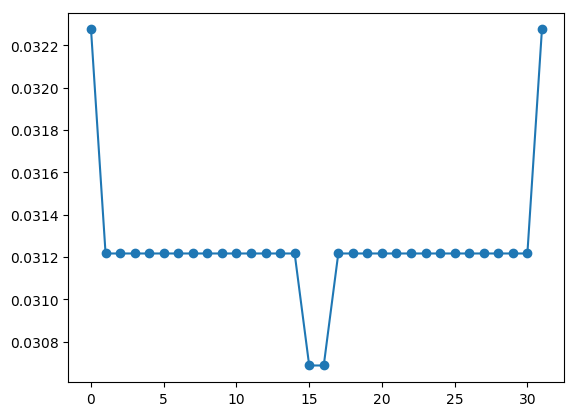

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x333358250>

In [6]:
plot(c2_coliphage_beamstop_only_corrected[:,10,15], "-o")

In [14]:
run(`mkdir /Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/coliphage_corrected`)
serializeToFile("/Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/coliphage_corrected/histo.dat", (coliphage_params, c2_coliphage_corrected, c3_coliphage_corrected, c1_coliphage))
println("Saved")

mkdir: /Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/coliphage_corrected: File exists


LoadError: failed process: Process(`mkdir /Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/coliphage_corrected`, ProcessExited(1)) [1]

In [15]:

# # c2_coliphage_corrected_filtered = add_Gaussian_filter(c2_coliphage_corrected)
# println("done")

In [8]:
plot_random_2photon_slices(Dict(
        "c2_coliphage_with_beamstop"=>c2_coliphage_with_beamstop/sumabs(c2_coliphage_with_beamstop),
        "c2_coliphage_corrected"=>c2_coliphage_corrected/sumabs(c2_coliphage_corrected)
        ))

LoadError: UndefVarError: plot_random_2photon_slices not defined

In [21]:
L,LMAX,N,K3,K2,qm,lambda = 12,25,32,26,38,pi/1160.0,0.0#7.75

(12,25,32,26,38,0.0027082695289567184,0.0)

In [22]:
intensity_coliphage_beamstop = retrieveSolution(c2_coliphage_with_beamstop,Integer(L),LMAX, 5:K2, qm,lambda)
c2_coliphage_beamstop_theo = twoPhotons(intensity_coliphage_beamstop, BasisType(N,L,LMAX,K3,lambda,qm/K2), K2, true, false)
println("Done")

Extracting solution over K2_range=5:38 with K2=34 and L=12.
Done


Interact.Options{:SelectionSlider,Any}(8: "input-4" = 19 Any ,"k1",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(10: "input-5" = 19 Any ,"k2",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Checkbox(12: "input-6" = true Bool ,"normalization",true)

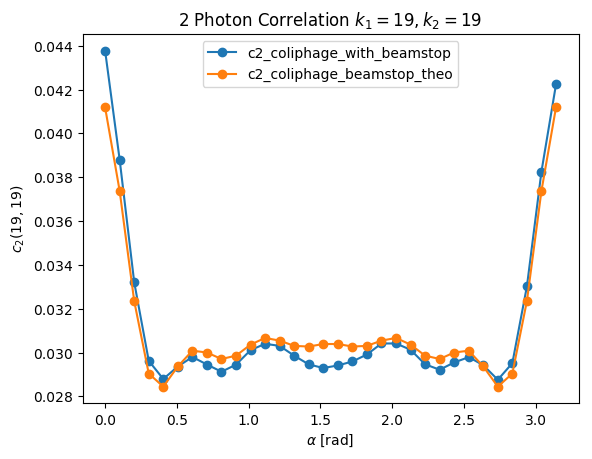

In [23]:
plot_random_2photon_slices(Dict(
        "c2_coliphage_beamstop_theo"=>c2_coliphage_beamstop_theo/sumabs(c2_coliphage_beamstop_theo),
        "c2_coliphage_with_beamstop"=>c2_coliphage_with_beamstop/sumabs(c2_coliphage_with_beamstop)))

Interact.Options{:SelectionSlider,Any}(10: "input-5" = 13 Any ,"k1",13,"13",13,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9"),Pair{Any,Any}(25,"25"),Pair{Any,Any}(10,"10"),Pair{Any,Any}(26,"26")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(12: "input-6" = 13 Any ,"k2",13,"13",13,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9"),Pair{Any,Any}(25,"25"),Pair{Any,Any}(10,"10"),Pair{Any,Any}(26,"26")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(14: "input-7" = 13 Any ,"k3",13,"13",13,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9"),Pair{Any,Any}(25,"25"),Pair{Any,Any}(10,"10"),Pair{Any,Any}(26,"26")…)),Any[],Any[],true,"horizontal")

Interact.Checkbox(16: "input-8" = true Bool ,"normalization",true)

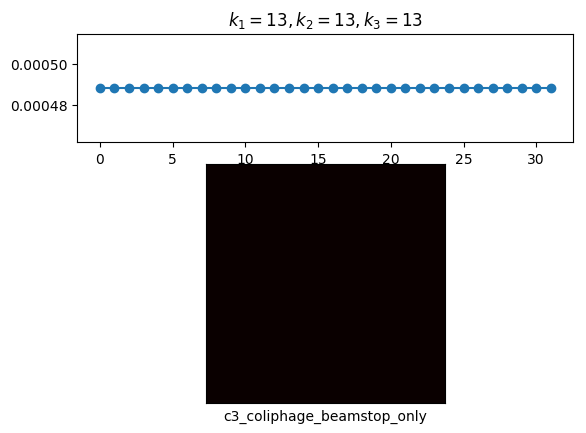

In [12]:
plot_random_3photon_slices(Dict(
        "c3_coliphage_beamstop_only"=>c3_coliphage_beamstop_only,
#         "c3_coliphage_corrected"=>c3_coliphage_corrected,
#         "c3_coliphage_with_beamstop"=>c3_coliphage_with_beamstop
        ), 0.0)

# Crambin with Beamstop

In [6]:
creload("ThreePhotons")

INFO: Reloading ThreePhotons


"ThreePhotons"

In [19]:
include("plotting.jl")

compare_histogram_with_theory

In [41]:
density_K38,fourier_K38,intensity_K38 = createSphericalHarmonicsStructure("/Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin.pdb", 25, 38, float(38))
densityCube_K38,fourierCube_K38,intensityCube_K38 = createCubicStructure("/Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin.pdb", 2*38+1, float(38))
println("Done")

Initializing SH structure from /Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin.pdb with LMAX=25, KMAX=38, rmax=38.0.
Initializing cubic structure from /Users/ben/Documents/biophysics/projects/reconstruction/data/structures/crambin.pdb with cubesize=77, rmax=38.0.
Done


In [42]:
L,LMAX,N,K3,K2,qm,lambda = 18,25,32,26,38,intensity_K38.rmax,0.0#7.75

(18,25,32,26,38,3.141592653589793,0.0)

In [7]:
c2crambin_beamstop,_,c3crambin_beamstop,_,c1crambin_beamstop = loadHistograms(16,16,"/Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/data_generation/Ewald_lambda_0.0_beamstop_SH_10p_N32_K2_38_K3_26_R38.0_P3153920000/histo.dat", true)
c2crambin,_,c3crambin,_ = loadHistograms(16,16,"/Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/data_generation/SH_10p_N32_K38_R38.0_P3276800000/histo.dat", false)
println("Done")

Loaded 6.255568434999968e9 doublets and 3.955949374e9 triplets from /Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/data_generation/Ewald_lambda_0.0_beamstop_SH_10p_N32_K2_38_K3_26_R38.0_P3153920000/histo.dat generated from 3153920000 pictures.
Loaded 3.4212799220997107e11 doublets and 1.1979746196510442e12 triplets from /Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/data_generation/SH_10p_N32_K38_R38.0_P3276800000/histo.dat generated from 3276800000 pictures.
Done


In [34]:
creload("ThreePhotons")

INFO: Reloading ThreePhotons


"ThreePhotons"

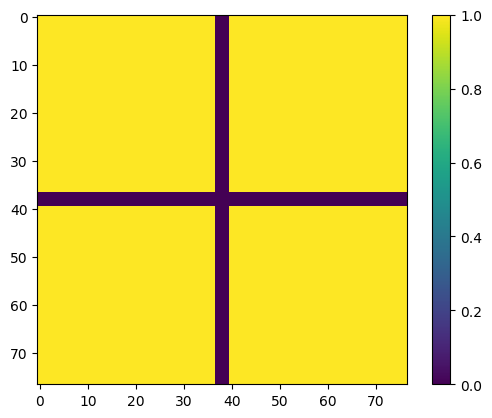

PyObject <matplotlib.colorbar.Colorbar object at 0x3338639d0>

In [35]:
qm = intensity_K38.rmax
delq = dr(intensity_K38)
range = -qm:delq:qm
beamstop_width = qmax(38,38.0)/20.0
crambin_beamstop = [beamstop([k1,k2], beamstop_width) for k1 in range, k2 in range]
imshow(crambin_beamstop)
colorbar()

In [36]:
cb1,cb2,cb3 = calculate_correlations_in_image( [crambin_beamstop], 38, 26, 32)
println("Done")

Processing batch 1
Processing image #1
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 

LoadError: InterruptException:
 in collect(::Base.Generator{Array{Float64,1},Base.##496#502{Int64}}) at ./array.jl:308
 in round(::Type{Int64}, ::Array{Float64,1}) at ./floatfuncs.jl:134
 in macro expansion at /Users/ben/Documents/biophysics/projects/reconstruction/ThreePhotons.jl/src/exp_data.jl:199 [inlined]
 in (::ThreePhotons.##432#436{Array{Array{Float64,2},1},Int64,Int64,Int64,Float64})(::ThreePhotons.##431#435, ::UnitRange{Int64}, ::Int64, ::Int64) at ./multi.jl:2024
 in (::Base.##620#621{ThreePhotons.##432#436{Array{Array{Float64,2},1},Int64,Int64,Int64,Float64},Tuple{ThreePhotons.##431#435,UnitRange{Int64},Int64,Int64},Array{Any,1}})() at ./multi.jl:1030
 in run_work_thunk(::Base.##620#621{ThreePhotons.##432#436{Array{Array{Float64,2},1},Int64,Int64,Int64,Float64},Tuple{ThreePhotons.##431#435,UnitRange{Int64},Int64,Int64},Array{Any,1}}, ::Bool) at ./multi.jl:1001
 in #remotecall_fetch#625(::Array{Any,1}, ::Function, ::Function, ::Base.LocalProcess, ::Function, ::Vararg{Any,N}) at ./multi.jl:1055
 in remotecall_fetch(::Function, ::Base.LocalProcess, ::Function, ::Vararg{Any,N}) at ./multi.jl:1055
 in #remotecall_fetch#629(::Array{Any,1}, ::Function, ::Function, ::Int64, ::Function, ::Vararg{Any,N}) at ./multi.jl:1080
 in remotecall_fetch(::Function, ::Int64, ::Function, ::Vararg{Any,N}) at ./multi.jl:1080
 in (::Base.##687#688{ThreePhotons.##431#435,ThreePhotons.##432#436{Array{Array{Float64,2},1},Int64,Int64,Int64,Float64},UnitRange{Int64},Array{UnitRange{Int64},1}})() at ./multi.jl:2009

In [16]:
function renormalize_correlation_alt(c2::C2)
    N,K2,_ = Base.size(c2)
    c2_sym = deepcopy(c2)
    for k1=1:K2
        for k2=1:K2
            c2_sym[:,k2,k1] = c2[:,k2,k1]/sumabs(c2[:,k2,k1])# + 1.0
        end
    end
    return c2_sym
end

renormalize_correlation_alt (generic function with 1 method)

In [31]:
cb2_corrected = deepcopy(cb2)#renormalize_correlation_alt(cb2)
println("Done")

Done


Interact.Options{:SelectionSlider,Any}(8: "input-4" = 19 Any ,"k1",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(10: "input-5" = 19 Any ,"k2",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Checkbox(12: "input-6" = true Bool ,"normalization",true)

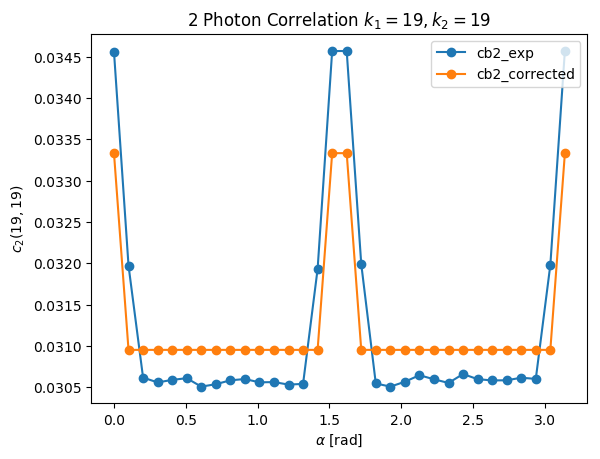

In [32]:
plot_random_2photon_slices(Dict(
#         "cb2"=>cb2/sumabs(cb2),
        "cb2_corrected"=>cb2_corrected,
        "cb2_exp"=>cb2_exp))

Interact.Options{:SelectionSlider,Any}(15: "input-7" = 13 Any ,"k1",13,"13",13,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9"),Pair{Any,Any}(25,"25"),Pair{Any,Any}(10,"10"),Pair{Any,Any}(26,"26")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(17: "input-8" = 13 Any ,"k2",13,"13",13,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9"),Pair{Any,Any}(25,"25"),Pair{Any,Any}(10,"10"),Pair{Any,Any}(26,"26")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(19: "input-9" = 13 Any ,"k3",13,"13",13,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9"),Pair{Any,Any}(25,"25"),Pair{Any,Any}(10,"10"),Pair{Any,Any}(26,"26")…)),Any[],Any[],true,"horizontal")

Interact.Checkbox(21: "input-10" = true Bool ,"normalization",true)

  likely near In[33]:1
  likely near In[33]:1
  likely near In[33]:1
  likely near In[33]:1


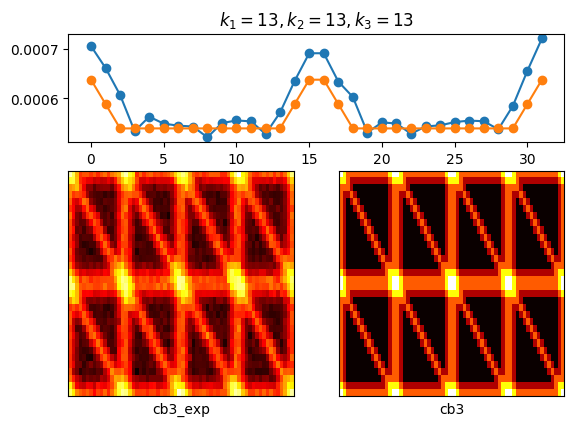

/Users/ben/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/Users/ben/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/numpy/ma/core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


In [33]:
plot_random_3photon_slices(Dict(
        "cb3_exp"=>cb3_exp,
        "cb3"=>cb3,
#         "c3crambin_beamstop"=>c3crambin_beamstop,
#         "cb3_corrected"=>cb3_exp
        ), 0.0)

In [273]:
# calculate_correlations_in_image( [crambin_beamstop], 38, 1, 32, "histo.dat")

In [19]:
# cb2,_,cb3,_,_ = loadHistograms(1,1,"/Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/exp_data/crambin_beamstop_short/histo.dat")
# cb2,_,cb3,_,_ = loadHistograms(1,1,"histo.dat")
cb2_exp,_,cb3_exp,_,_ = loadHistograms(1,1,"/Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/data_generation/beamstop_only_3_2p_N32_K2_38_K3_26_R38.0_P40960000/histo.dat")
println("Done")

Loaded 3.8380613050944916e10 doublets and 8.2628680582e10 triplets from /Users/ben/Documents/biophysics/projects/reconstruction/data/output_owl/data_generation/beamstop_only_3_2p_N32_K2_38_K3_26_R38.0_P40960000/histo.dat generated from 16384000 pictures.
Done


In [203]:
# cb2_corrected = symmetrize_correlation(add_Gaussian_filter(renormalize_correlation(cb2), 1.0))
# cb2_corrected = symmetrize_correlation(renormalize_correlation(cb2))
# println("done")

In [552]:
# cb2_corrected = symmetrize_correlation(add_Gaussian_filter(renormalize_correlation(cb2), 1.0))
cb2_corrected = renormalize_correlation(cb2)
# cb2_corrected = renormalize_correlation(cb2_exp)

# cb2_alt_corrected = symmetrize_correlation(add_Gaussian_filter(renormalize_correlation(cb2_alt), 1.0))
# cb2_alt_corrected = symmetrize_correlation(renormalize_correlation(cb2_alt))
# cb3_corrected = (renormalize_correlation(cb3_exp))
println("done")

done


In [553]:
c2_crambin_corrected = c2crambin_beamstop ./ cb2_corrected
c2_crambin_corrected[:,1:5,1:5] = zeros(N,5,5)
# c3_crambin_corrected = c3crambin_beamstop ./ cb3_corrected
println("done")

done


In [554]:
sumabs(cb2_corrected)

25562.0

In [555]:
sumabs(c2_crambin_corrected)

1.1657929755463042e9

Interact.Options{:SelectionSlider,Any}(361: "input-156" = 19 Any ,"k1",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(363: "input-157" = 19 Any ,"k2",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Checkbox(365: "input-158" = true Bool ,"normalization",true)

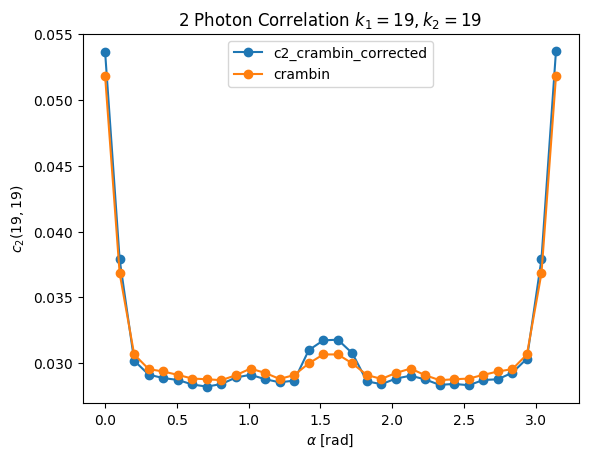

In [556]:
plot_random_2photon_slices(Dict(
        "c2_crambin_corrected"=>c2_crambin_corrected/sumabs(c2_crambin_corrected),
        "crambin"=>c2crambin/sumabs(c2crambin),
#         "crambin_beamstop"=>c2crambin_beamstop/sumabs(c2crambin_beamstop)
#         "cb2_corrected"=>cb2_corrected/sumabs(cb2_corrected)
        ))

In [16]:
intensity_crambin_beamstop = retrieveSolution(c2_crambin_corrected, Integer(L-2),LMAX, 6:K2, qm, lambda)
c2_crambin_beamstop_theo = twoPhotons(intensity_crambin_beamstop, BasisType(N,L,LMAX,K3,lambda,dq(intensity_crambin_beamstop)), K2, true, false)
println("Done")

Extracting solution over K2_range=6:38 with K2=33 and L=16.
Done


Interact.Options{:SelectionSlider,Any}(15: "input-7" = 19 Any ,"k1",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(17: "input-8" = 19 Any ,"k2",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Checkbox(19: "input-9" = true Bool ,"normalization",true)

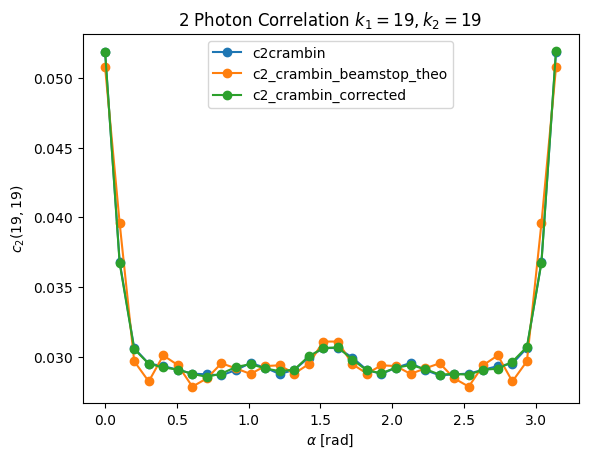

In [17]:
plot_random_2photon_slices(Dict(
        "c2_crambin_beamstop_theo"=>c2_crambin_beamstop_theo/sumabs(c2_crambin_beamstop_theo),
        "c2_crambin_corrected"=>c2_crambin_corrected/sumabs(c2_crambin_corrected),
        "c2crambin"=>c2crambin/sumabs(c2crambin)))

In [27]:
retrievedIntensity,FSC = checkRotationSearch(intensity_crambin_beamstop, intensity_K38, 6:K3, L-2, BasisType(N,L-2,LMAX, K3, lambda, dq(intensity_K38)); iterations=1.4e4, reduce_stepsize=1000, plotting=false, include_negativity=false, energy=(x)->0.0, save_structures=true)
println("Done")

0	FSC=-0.002252174257761649	E=0.0
Saving cube to output/rotation_check_0.mrc with cubesize=77
1000	FSC=0.3304130811446692	E=0.0
Saving cube to output/rotation_check_1000.mrc with cubesize=77
2000	FSC=0.3729036677547899	E=0.0
Saving cube to output/rotation_check_2000.mrc with cubesize=77
3000	FSC=0.40044255445462074	E=0.0
Saving cube to output/rotation_check_3000.mrc with cubesize=77
4000	FSC=0.42971860896464653	E=0.0
Saving cube to output/rotation_check_4000.mrc with cubesize=77
5000	FSC=0.49617865180003	E=0.0
Saving cube to output/rotation_check_5000.mrc with cubesize=77
6000	FSC=0.5872672770160777	E=0.0
Saving cube to output/rotation_check_6000.mrc with cubesize=77
7000	FSC=0.6616173759086794	E=0.0
Saving cube to output/rotation_check_7000.mrc with cubesize=77
8000	FSC=0.7154582725322408	E=0.0
Saving cube to output/rotation_check_8000.mrc with cubesize=77
9000	FSC=0.7472660211470442	E=0.0
Saving cube to output/rotation_check_9000.mrc with cubesize=77
10000	FSC=0.7667132848038788	E=0.

Saving cube to retrievedIntensity.mrc with cubesize=77


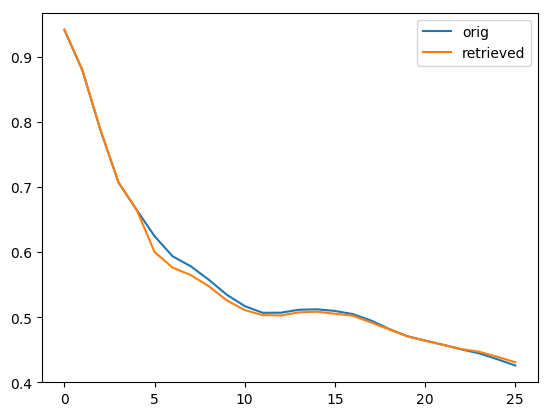

Saving cube to retrievedIntensity_with_center.mrc with cubesize=77


In [51]:
surf_orig = getSurfaceVolume(intensity_K38)
weights_orig = [sumabs(surf_orig.surf[k]) for k=1:K3]

surf_retrieved_with_center = getSurfaceVolume(retrievedIntensity)

for k = 1:5
    surf_retrieved_with_center.surf[k] = surf_orig.surf[k] * 1.5*sumabs(surf_retrieved_with_center.surf[6])/sumabs(surf_orig.surf[6])
end

# surf_retrieved_with_center = getSurfaceVolume(retrievedIntensity_with_center)
weights_retrieved = [sumabs(surf_retrieved_with_center.surf[k]) for k=1:K3]

plot((weights_orig/sumabs(weights_orig)).^(0.1), label="orig")
plot((weights_retrieved/sumabs(weights_retrieved)).^(0.1), label="retrieved")

legend()
saveCube(retrievedIntensity,"retrievedIntensity.mrc")
saveCube(getSphericalHarmonicsVolume(surf_retrieved_with_center),"retrievedIntensity_with_center.mrc")

In [52]:
fittedDensityCube,isc,fsc,isc_nofitting = calculateSC(deleteTerms(getSphericalHarmonicsVolume(surf_retrieved_with_center), 22, 16), densityCube_K38, fourierCube_K38, intensityCube_K38, 2*nworkers())
saveCube(fittedDensityCube,"retrievedElectronDensity.mrc")

Correlation in realspace of fit: 0.627191310840264
Resolution of fit: 5.160914481939525
Correlation in realspace of fit: 0.6294410390410694
Resolution of fit: 6.085887629636467
Best resolution: 4.017199165885954
Best density correlation: 0.6726308443898773
Saving cube to retrievedElectronDensity.mrc with cubesize=77


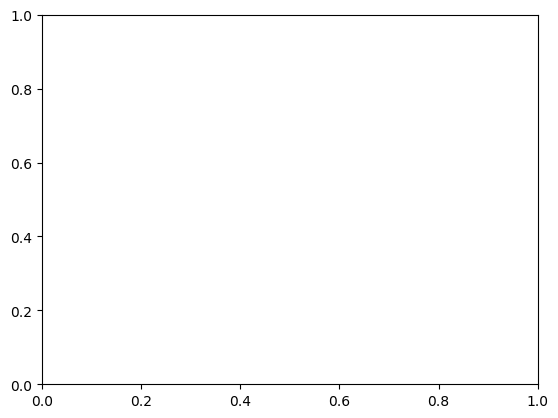

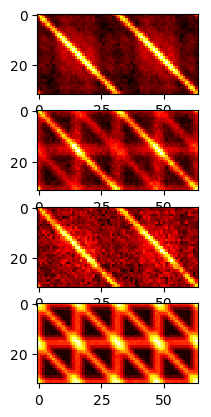

PyObject <matplotlib.image.AxesImage object at 0x32e1204d0>

In [53]:
k1,k2,k3=15,11,10
subplot(4,1,1)
imshow(c3crambin[:,:,k3,k2,k1], cmap="hot")
subplot(4,1,2)
imshow(c3crambin_beamstop[:,:,k3,k2,k1], cmap="hot")
subplot(4,1,3)
imshow(c3_crambin_corrected[:,:,k3,k2,k1], cmap="hot")
subplot(4,1,4)
imshow(cb3_corrected[:,:,k3,k2,k1], cmap="hot")

Interact.Options{:SelectionSlider,Any}(58: "input-26" = 19 Any ,"k1",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(60: "input-27" = 19 Any ,"k2",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Any}(62: "input-28" = 19 Any ,"k3",19,"19",19,Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict{Any,Any}(Pair{Any,Any}(18,"18"),Pair{Any,Any}(30,"30"),Pair{Any,Any}(33,"33"),Pair{Any,Any}(32,"32"),Pair{Any,Any}(2,"2"),Pair{Any,Any}(16,"16"),Pair{Any,Any}(11,"11"),Pair{Any,Any}(21,"21"),Pair{Any,Any}(7,"7"),Pair{Any,Any}(9,"9")…)),Any[],Any[],true,"horizontal")

Interact.Checkbox(64: "input-29" = true Bool ,"normalization",true)

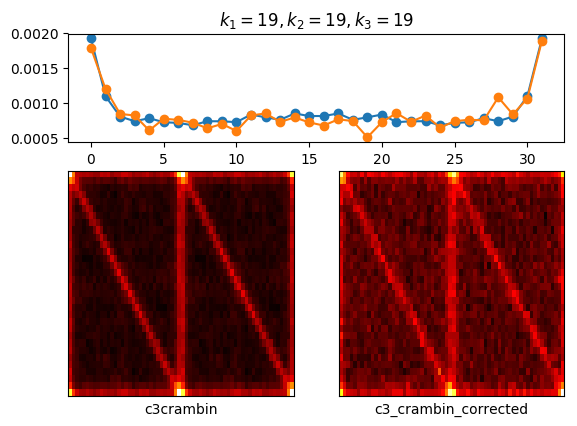

In [47]:
plot_random_3photon_slices(Dict(
        "c3_crambin_corrected"=>c3_crambin_corrected,
        "c3crambin"=>c3crambin,
#         "c3crambin_beamstop"=>c3crambin_beamstop,
#         "cb3_corrected"=>cb3_exp
        ), 0.0)